<a href="https://colab.research.google.com/github/IrisFDTD/OPTICS-UNIZAR/blob/main/Topic_9/chapter9_twyman_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>

```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






---
# **Óptica - Tema 9 - Interferómetro de Twyman - Interferometría por transformada de Fourier**

---

# Cálculo de $g_p(\nu)$ numérico (usando la integral)

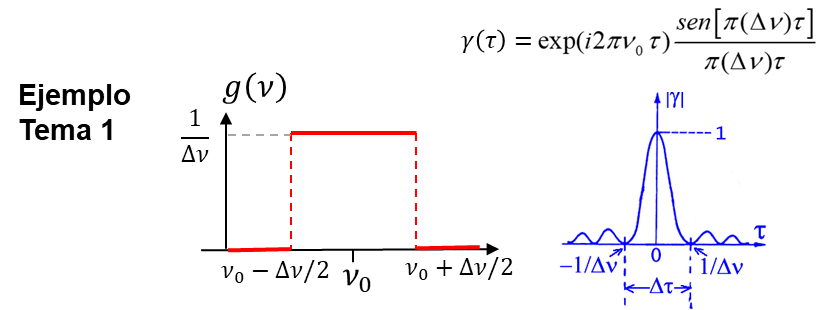

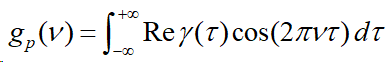

In [ ]:
# Define the functions
def gamma(t, v, v0, Dv):
  return np.exp(1j*2.0 * np.pi * v0 * t) * np.sin(np.pi * Dv * t)/(np.pi * Dv * t)

def gp(t, v, v0, Dv):
    return  np.cos(2.0 * np.pi * v * t)*np.real(gamma(t, v, v0, Dv))

def gamma_r(t, v, v0, Dv):
  return np.cos(2.0 * np.pi * v * t)*1/Dv

In [ ]:
import numpy as np
from scipy.integrate import simpson

# Parameters
v0 = 80.0
Dv = 5.0

# Integration limits
t_min = -np.inf
t_max = np.inf

# Perform the integration
t=np.linspace(-1.0,1.0,10000)
v=v0
gp_num=gp(t,v,v0,Dv)
integral_gp=simpson(gp_num,t)

# Display the result
print("For v0=",v0," the value of g(v) at v",v)
print("g(v) analytic=",1/Dv)
print("gp(v)=",integral_gp)
print("2*gp(v)=",2.0*integral_gp)

For v0= 80.0  the value of g(v) at v 80.0
g(v) analytic= 0.2
gp(v)= 0.10402044326282249
2*gp(v)= 0.20804088652564498


# Compare $Re(\gamma(\tau))$: numeric vs analytic

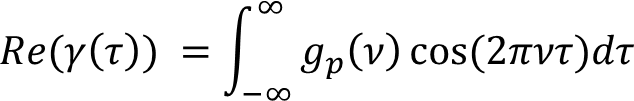

In [ ]:
t_0=0.1
int_gamma_r=[]
t_num=np.linspace(0,0.1,200)
for i,t_0 in enumerate(t_num):
  # Integral nu>0
  nu_gamma=np.linspace(v0-Dv/2.0,v0+Dv/2.0,1000)
  gamma_r_num=gamma_r(t_0,nu_gamma,v0,2*Dv) # Factor 2 for gp definition
  integral_gamma_r=simpson(gamma_r_num,nu_gamma)

  # Integral nu<0
  nu_gamma=np.linspace(-v0-Dv/2,-v0+Dv/2,1000)
  gamma_r_num=gamma_r(t_0,nu_gamma,v0,2*Dv)# Factor 2 for gp definition
  integral_gamma_r=integral_gamma_r+simpson(gamma_r_num,nu_gamma)

  #print("Integral gamma_r=",integral_gamma_r," at tau=",t_0)
  analytic_gamma_r=np.real(gamma(t_0, v0, v0, Dv))
  #print("Analytic gamma r=",analytic_gamma_r," at tau=",t_0)
  int_gamma_r.append(integral_gamma_r)

<ipython-input-2-452f911f85e7>:3: RuntimeWarning: invalid value encountered in cdouble_scalars
  return np.exp(1j*2.0 * np.pi * v0 * t) * np.sin(np.pi * Dv * t)/(np.pi * Dv * t)


<ipython-input-2-452f911f85e7>:3: RuntimeWarning: invalid value encountered in divide
  return np.exp(1j*2.0 * np.pi * v0 * t) * np.sin(np.pi * Dv * t)/(np.pi * Dv * t)


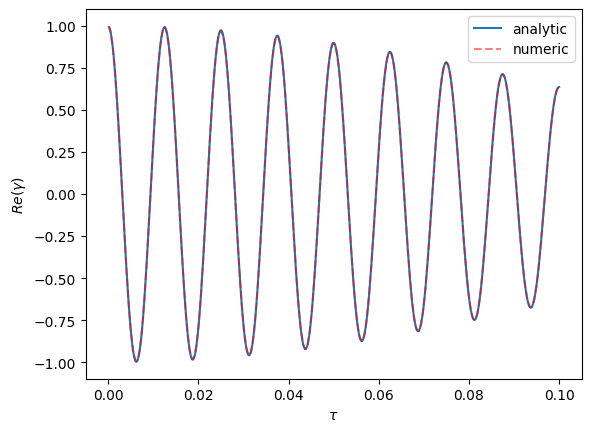

In [ ]:
import matplotlib.pyplot as plt
v=v0
t=np.linspace(0.0,0.1,400)
plt.plot(t,np.real(gamma(t,v,v0,Dv)),label='analytic')
plt.plot(t_num,int_gamma_r,color='red',linestyle='--',alpha=0.5,label='numeric')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$Re(\gamma)$')
plt.legend()
plt.show()